# Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Preprocessing

In [2]:
df = pd.read_csv('merged_dataset.csv')
df

,mean_1,standard_deviation_1,median_1,min_value_1,max_value_1,range_1,interquartile_range_1,q1_1,q3_1,kurtosis_1,...,max_value_2,range_2,interquartile_range_2,q1_2,q3_2,kurtosis_2,skewness_2,station_2,channel_2,class_2
0,-10087.594937,1095.953766,-10445.0,-14409,-7321,7088,1950.00,-10895.0,-8945.00,-0.844598,...,18687.0,38200.0,2413.0,-1202.0,1211.0,4.000728,-0.148950,MEPAS,HHN,BEBENG
1,-8315.313791,1203.245256,-8298.0,-14163,-2830,11333,771.00,-8675.0,-7904.00,6.035557,...,7978.0,18472.0,1331.0,-702.0,629.0,4.808834,-0.082384,MEPAS,HHZ,BEBENG
2,-11952.875455,1373.377233,-11634.5,-18896,-7042,11854,1283.25,-12461.0,-11177.75,3.624293,...,14202.0,27933.0,2114.0,-1019.0,1095.0,3.309459,0.181159,MEPAS,HHE,BEBENG
3,-12356.716855,1779.579821,-12849.0,-16766,-5367,11399,2072.00,-13566.0,-11494.00,1.122037,...,14202.0,27933.0,2114.0,-1019.0,1095.0,3.309459,0.181159,MEPAS,HHE,BEBENG
4,-10712.443704,1240.537369,-10833.0,-15870,-4034,11836,1215.00,-11395.0,-10180.00,3.125415,...,18687.0,38200.0,2413.0,-1202.0,1211.0,4.000728,-0.148950,MEPAS,HHN,BEBENG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,310.812791,3725.247662,395.0,-16810,14033,30843,3997.00,-1665.0,2332.00,1.618849,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0,0
816,-118.743504,10286.564361,5.0,-33741,47380,81121,13502.00,-6939.0,6563.00,0.447013,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0,0
817,-236.231179,16593.166954,-404.0,-77335,67937,145272,10074.00,-5011.0,5063.00,4.286426,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0,0
818,724.815456,6119.723563,461.0,-26119,35465,61584,5905.00,-2383.0,3522.00,4.478436,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0,0


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Assuming merged_df is your DataFrame
# Separate features and labels
X = df.drop(['class_1', 'class_2', 'station_1', 'station_2', 'channel_1', 'channel_2'], axis=1)
y = df['class_1']

# Label encoding for the target label
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [5]:
from imblearn.over_sampling import SMOTE
print("========================SEBELUM SMOTE========================== \n")

# Mendapatkan jumlah data untuk setiap kelas dalam y_train dan y_test
train_class_counts = pd.Series(y_train).value_counts()
test_class_counts = pd.Series(y_test).value_counts()

# Menampilkan jumlah data untuk setiap kelas
print("Data Latih:")
for class_label, count in train_class_counts.items():
    print(f"{label_encoder.inverse_transform([class_label])[0]} = {count} data")

print("\nData Uji:")
for class_label, count in test_class_counts.items():
    print(f"{label_encoder.inverse_transform([class_label])[0]} = {count} data")

# Menggunakan SMOTE untuk menambah data testing
smote = SMOTE(random_state=42)

# Hanya melakukan oversampling pada data uji
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

print("========================SESUDAH SMOTE========================== \n")
# Mendapatkan jumlah data untuk setiap kelas dalam y_train dan y_test setelah SMOTE
train_class_counts = pd.Series(y_train_smote).value_counts()
test_class_counts = pd.Series(y_test_smote).value_counts()

print("Data Latih:")
for class_label, count in train_class_counts.items():
    print(f"{label_encoder.inverse_transform([class_label])[0]} = {count} data")

print("\nData Uji:")
for class_label, count in test_class_counts.items():
    print(f"{label_encoder.inverse_transform([class_label])[0]} = {count} data")


========================SEBELUM SMOTE========================== 

Data Latih:
BEBENG = 593 data
GENDOL = 32 data
BOYONG = 31 data

Data Uji:
BEBENG = 148 data
BOYONG = 8 data
GENDOL = 8 data
========================SESUDAH SMOTE========================== 

Data Latih:
BEBENG = 593 data
BOYONG = 593 data
GENDOL = 593 data

Data Uji:
BOYONG = 148 data
BEBENG = 148 data
GENDOL = 148 data


In [6]:
class_names = df['class_1'].unique()

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model KNN
knn_model = KNeighborsClassifier()

# Tentukan rentang nilai K yang ingin dieksplorasi
param_dist = {
    'n_neighbors': range(1, 27),
    'p' : [2]
}
  # Contoh: kita ingin mencoba nilai K dari 1 hingga 20

# Inisialisasi objek RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=knn_model, param_distributions=param_dist, n_iter=100, cv=3, scoring='accuracy', random_state=42)

# Latih model menggunakan Random Search
random_search.fit(X_train_smote, y_train_smote)

# Evaluasi model terbaik pada data uji
best_knn_model = random_search.best_estimator_
y_pred = best_knn_model.predict(X_test_smote)

# Tampilkan laporan klasifikasi
print(classification_report(y_test_smote, y_pred, target_names=class_names))


d:\Python 3.11.8\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 26 is smaller than n_iter=100. Running 26 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


              precision    recall  f1-score   support

      BEBENG       0.87      0.95      0.91       148
      BOYONG       0.94      0.86      0.90       148
      GENDOL       1.00      1.00      1.00       148

    accuracy                           0.93       444
   macro avg       0.94      0.93      0.93       444
weighted avg       0.94      0.93      0.93       444



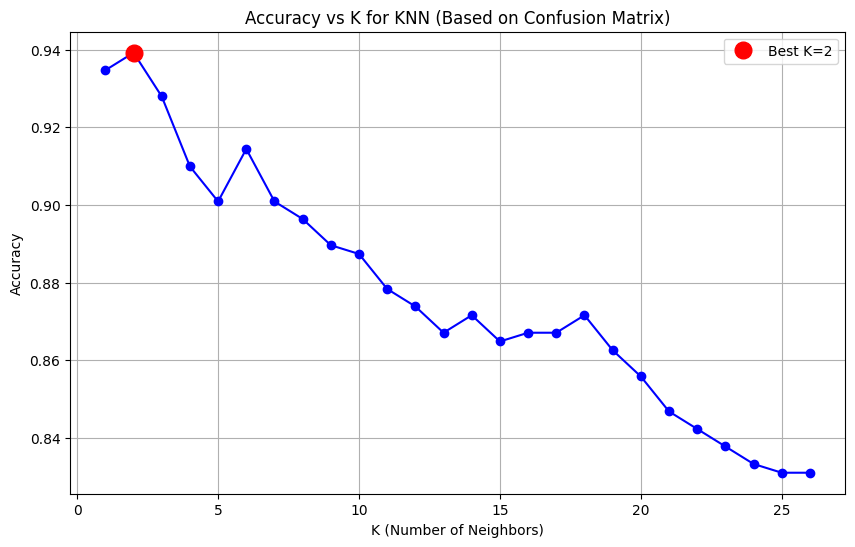

Best K: 2
Best Accuracy: 0.9392


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train_smote, y_train_smote, X_test_smote, y_test_smote are already defined

# Define the range of K values to test
k_values = range(1, 27)

# Lists to store the results
accuracies = []

# Train and evaluate KNN for each K value
for k in k_values:
    # Initialize and train the KNN model
    knn = KNeighborsClassifier(n_neighbors=k, p=2)
    knn.fit(X_train_smote, y_train_smote)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test_smote)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_smote, y_pred)
    accuracies.append(accuracy)

# Find the best K and its corresponding accuracy
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'bo-')
plt.title('Accuracy vs K for KNN (Based on Confusion Matrix)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)

# Mark the best K
plt.plot(best_k, best_accuracy, 'ro', markersize=12, label=f'Best K={best_k}')

plt.legend()
plt.show()

# Print the best K and its accuracy
print(f"Best K: {best_k}")
print(f"Best Accuracy: {best_accuracy:.4f}")

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model KNN
knn_model = KNeighborsClassifier()

# Tentukan rentang nilai K yang ingin dieksplorasi
param_dist = {
    'n_neighbors': range(1, 27),
    'p' : [2]
}
  # Contoh: kita ingin mencoba nilai K dari 1 hingga 20

# Inisialisasi objek RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=knn_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Latih model menggunakan Random Search
random_search.fit(X_train_smote, y_train_smote)

# Tampilkan hasil pencarian parameter
print("Best parameter (K):", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Evaluasi model terbaik pada data uji
best_knn_model = random_search.best_estimator_
y_pred = best_knn_model.predict(X_test_smote)

# Tampilkan laporan klasifikasi
print(classification_report(y_test_smote, y_pred, target_names=class_names))


d:\Python 3.11.8\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 26 is smaller than n_iter=100. Running 26 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameter (K): {'p': 2, 'n_neighbors': 1}
Best cross-validation score: 0.9859423959487261
              precision    recall  f1-score   support

      BEBENG       0.87      0.95      0.91       148
      BOYONG       0.94      0.86      0.90       148
      GENDOL       1.00      1.00      1.00       148

    accuracy                           0.93       444
   macro avg       0.94      0.93      0.93       444
weighted avg       0.94      0.93      0.93       444



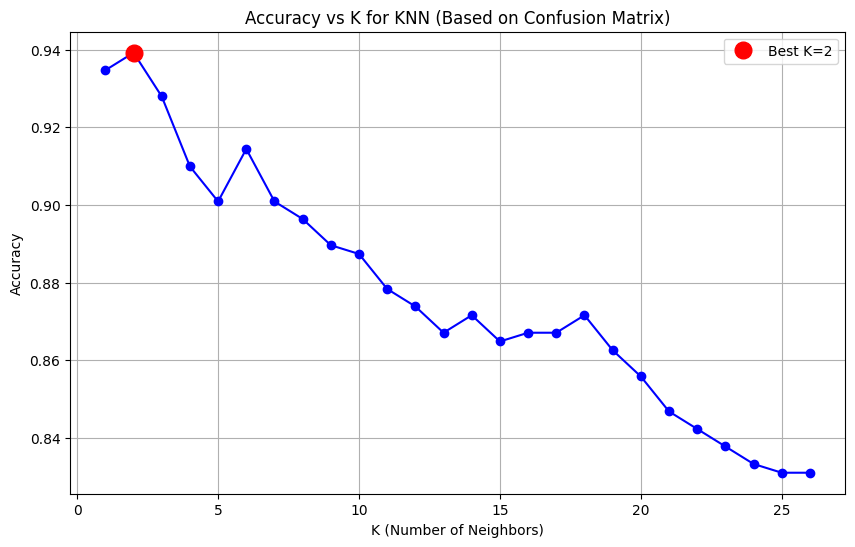

Best K: 2
Best Accuracy: 0.9392


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train_smote, y_train_smote, X_test_smote, y_test_smote are already defined

# Define the range of K values to test
k_values = range(1, 27)

# Lists to store the results
accuracies = []

# Train and evaluate KNN for each K value
for k in k_values:
    # Initialize and train the KNN model
    knn = KNeighborsClassifier(n_neighbors=k, p=2)
    knn.fit(X_train_smote, y_train_smote)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test_smote)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_smote, y_pred)
    accuracies.append(accuracy)

# Find the best K and its corresponding accuracy
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'bo-')
plt.title('Accuracy vs K for KNN (Based on Confusion Matrix)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)

# Mark the best K
plt.plot(best_k, best_accuracy, 'ro', markersize=12, label=f'Best K={best_k}')

plt.legend()
plt.show()

# Print the best K and its accuracy
print(f"Best K: {best_k}")
print(f"Best Accuracy: {best_accuracy:.4f}")